<a href="https://colab.research.google.com/github/Thivakaran12/Spam-mail-classification/blob/main/ML_CW_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Spam Mail Classification Using Decision Tree**

In [36]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Importing the dataset
column_names = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_%3B','char_freq_%28','char_freq_%5B','char_freq_%21','char_freq_%24','char_freq_%23','capital_run_length_average','capital_run_length_longest','capital_run_length_total','class']
dataset = pd.read_csv('/content/spambase.data', delimiter =',', header=None, names=column_names)

Understanding the data

In [38]:
dataset.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [39]:
dataset.shape

(4601, 58)

In [40]:
dataset.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [41]:
dataset.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [42]:
#seperating the spam mails and non-spam mails
dataset['class'].value_counts()

0    2788
1    1813
Name: class, dtype: int64

In [43]:
dataset.nunique() #outputs the unique values

word_freq_make                 142
word_freq_address              171
word_freq_all                  214
word_freq_3d                    43
word_freq_our                  255
word_freq_over                 141
word_freq_remove               173
word_freq_internet             170
word_freq_order                144
word_freq_mail                 245
word_freq_receive              113
word_freq_will                 316
word_freq_people               158
word_freq_report               133
word_freq_addresses            118
word_freq_free                 253
word_freq_business             197
word_freq_email                229
word_freq_you                  575
word_freq_credit               148
word_freq_your                 401
word_freq_font                  99
word_freq_000                  164
word_freq_money                143
word_freq_hp                   395
word_freq_hpl                  281
word_freq_george               240
word_freq_650                  200
word_freq_lab       

Relationship Anaysis

In [44]:
corelation = dataset.corr()

<Axes: >

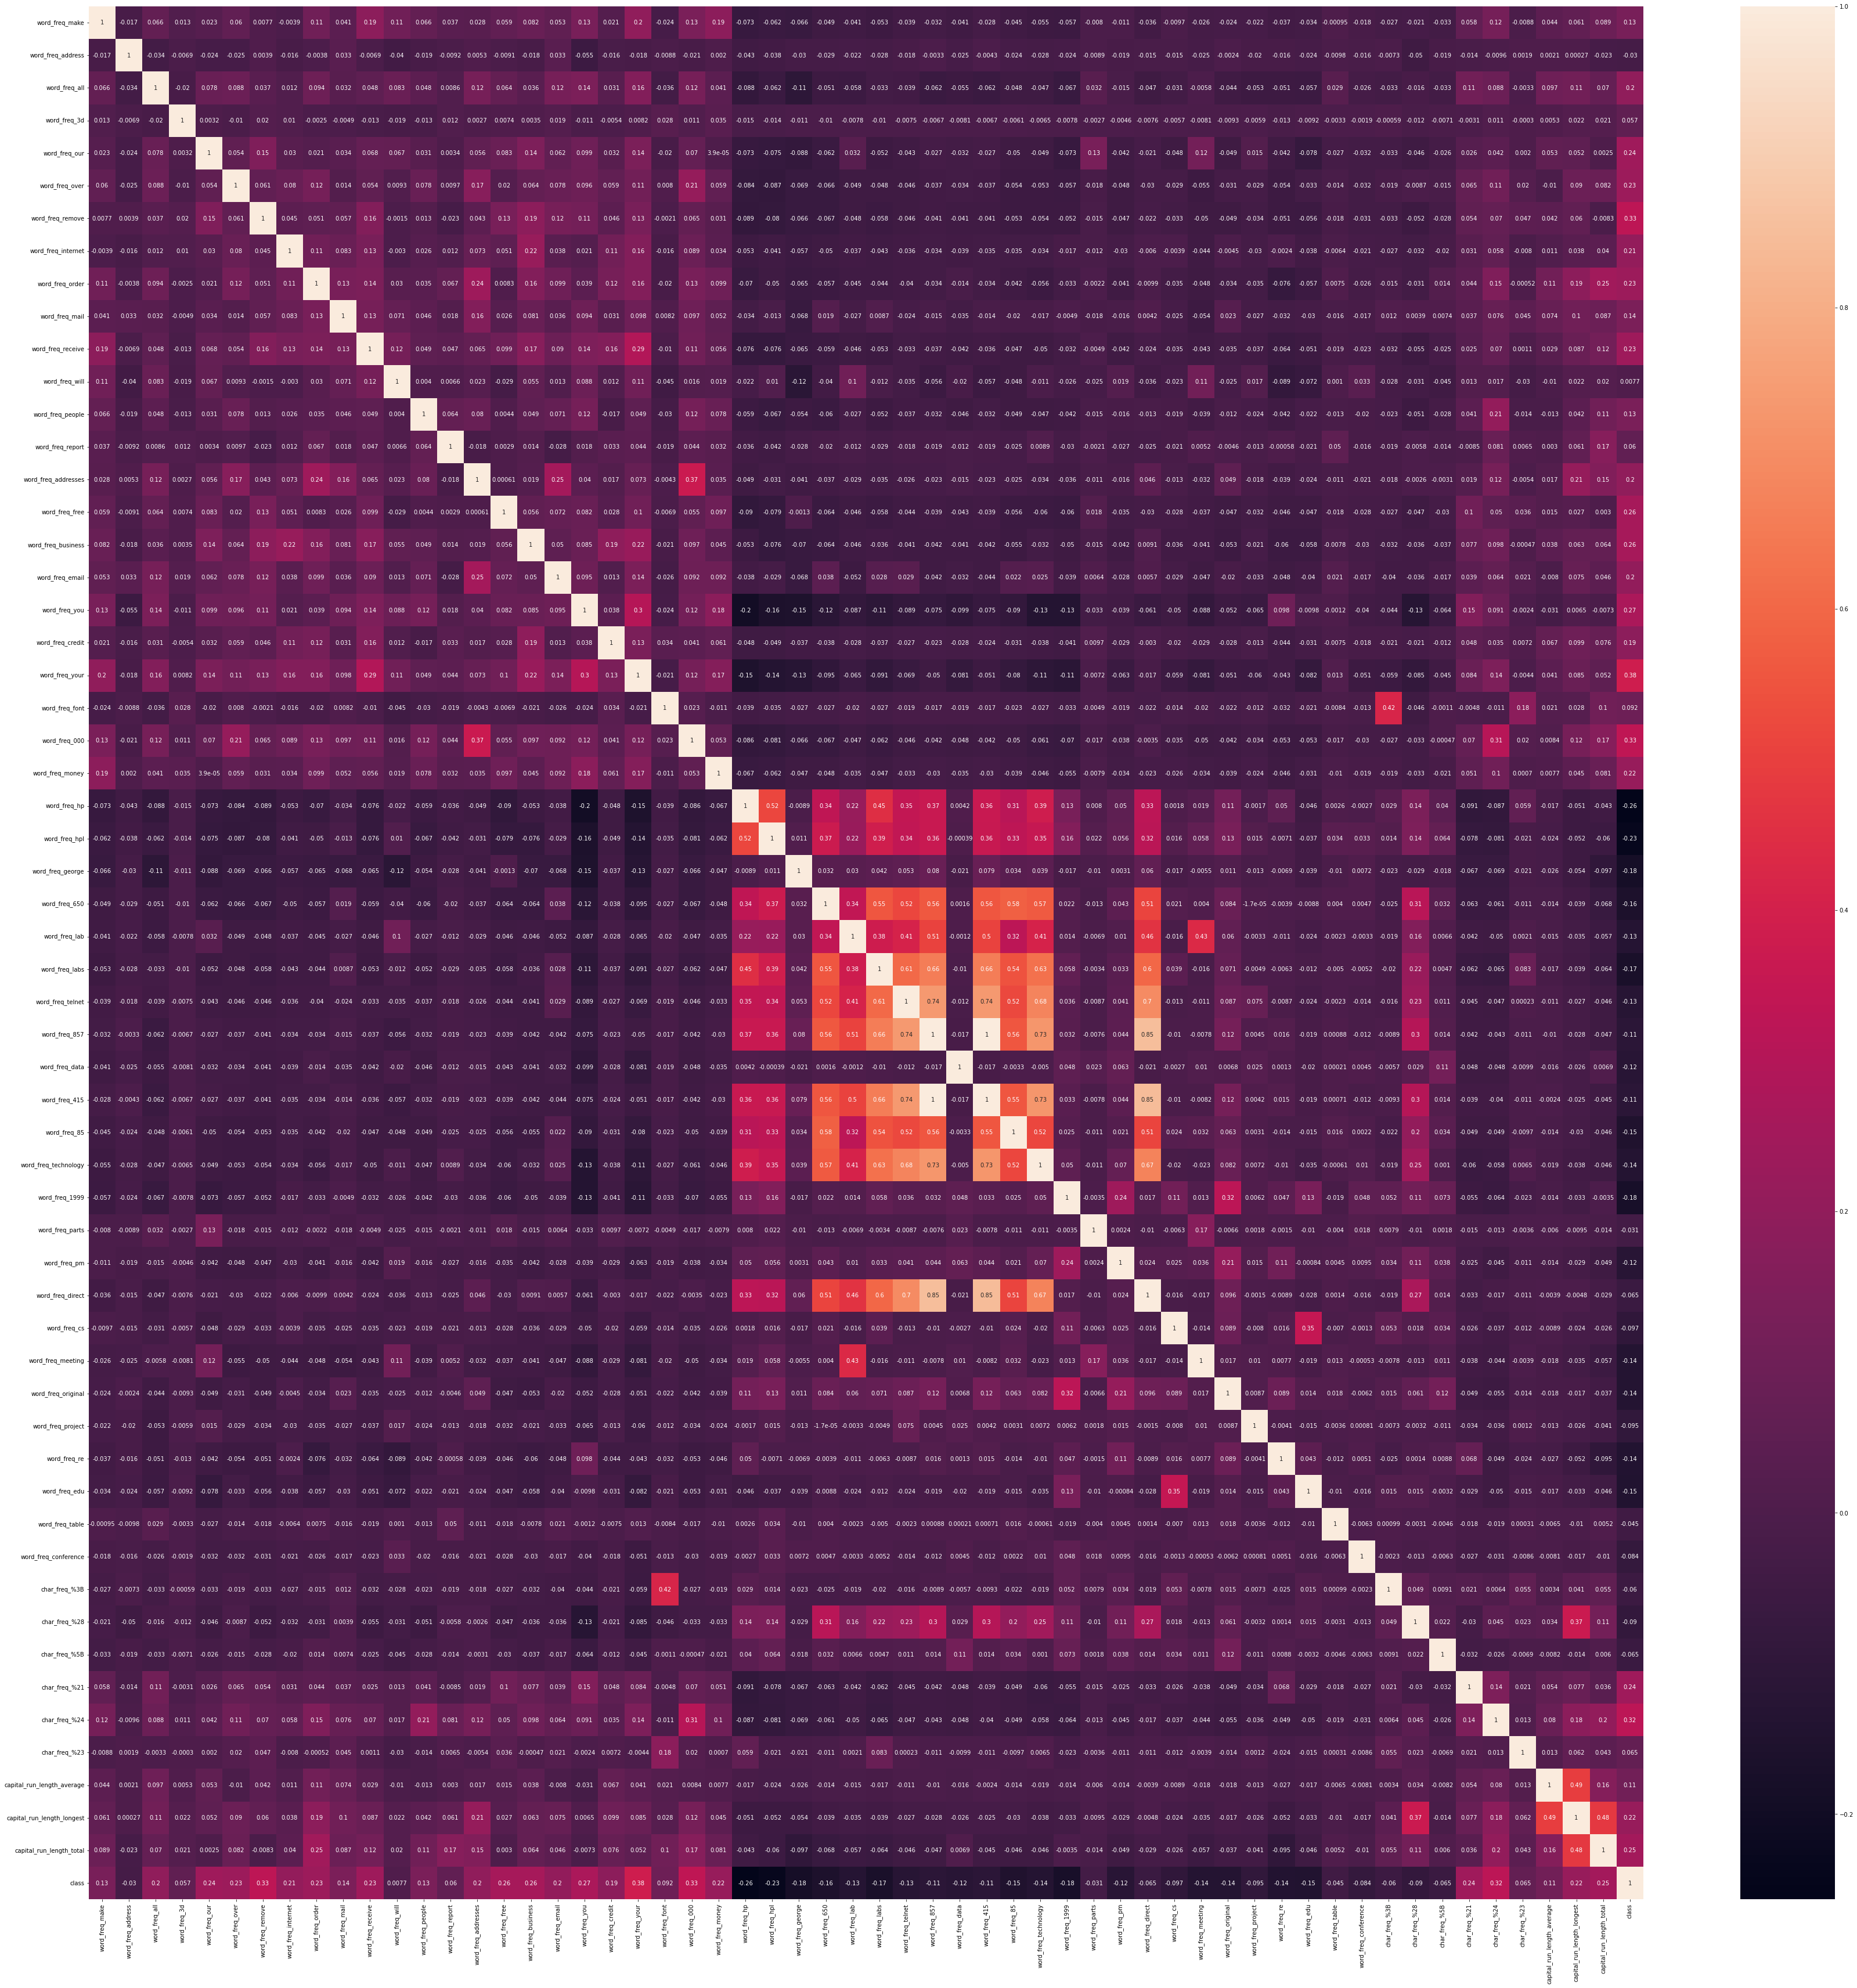

In [45]:
plt.figure(figsize=(60,60))
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

Cleaning the data

In [46]:
#data cleaning
dataset.dropna(inplace=True)
dataset.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

Data Preprocessing

In [47]:
#Split the dataset into feature set and target variable
X = dataset.drop('class', axis = 'columns')
y = dataset['class'].values

In [48]:
y_df = pd.DataFrame(data=y, columns=['class'])

In [49]:
print(X.shape)
print(y_df.shape)

(4601, 57)
(4601, 1)


Standardize the features

In [50]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X)

In [51]:
scaled_data = pd.DataFrame( data = X_scaled , columns =X.columns)

In [52]:
scaled_data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4.601000e+03,4.601000e+03,4.601000e+03,4601.000000,4.601000e+03,4.601000e+03,4.601000e+03,4601.000000,4.601000e+03,4.601000e+03,...,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4601.000000,4.601000e+03,4601.000000,4.601000e+03,4.601000e+03,4.601000e+03
mean,1.853187e-17,2.779780e-17,2.470916e-17,0.000000,4.941832e-17,3.706374e-17,-2.470916e-17,0.000000,2.470916e-17,1.235458e-17,...,-6.177290e-18,3.088645e-17,-7.412748e-17,1.544322e-17,0.000000,-2.470916e-17,0.000000,4.324103e-17,1.235458e-17,2.470916e-17
std,1.000109e+00,1.000109e+00,1.000109e+00,1.000109,1.000109e+00,1.000109e+00,1.000109e+00,1.000109,1.000109e+00,1.000109e+00,...,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109,1.000109e+00,1.000109,1.000109e+00,1.000109e+00,1.000109e+00
min,-3.424337e-01,-1.650719e-01,-5.567606e-01,-0.046900,-4.643144e-01,-3.502662e-01,-2.917939e-01,-0.262562,-3.233024e-01,-3.713644e-01,...,-1.115462e-01,-1.584534e-01,-5.143065e-01,-1.551977e-01,-0.329912,-3.083549e-01,-0.103048,-1.321161e-01,-2.625994e-01,-4.656073e-01
25%,-3.424337e-01,-1.650719e-01,-5.567606e-01,-0.046900,-4.643144e-01,-3.502662e-01,-2.917939e-01,-0.262562,-3.233024e-01,-3.713644e-01,...,-1.115462e-01,-1.584534e-01,-5.143065e-01,-1.551977e-01,-0.329912,-3.083549e-01,-0.103048,-1.135824e-01,-2.369413e-01,-4.095278e-01
50%,-3.424337e-01,-1.650719e-01,-5.567606e-01,-0.046900,-4.643144e-01,-3.502662e-01,-2.917939e-01,-0.262562,-3.233024e-01,-3.713644e-01,...,-1.115462e-01,-1.584534e-01,-2.738561e-01,-1.551977e-01,-0.329912,-3.083549e-01,-0.103048,-9.189671e-02,-1.907567e-01,-3.105639e-01
75%,-3.424337e-01,-1.650719e-01,2.764271e-01,-0.046900,1.007920e-01,-3.502662e-01,-2.917939e-01,-0.262562,-3.233024e-01,-1.231813e-01,...,-1.115462e-01,-1.584534e-01,1.811501e-01,-1.551977e-01,0.056314,-9.684841e-02,-0.103048,-4.682327e-02,-4.707129e-02,-2.851691e-02
max,1.452700e+01,1.090096e+01,9.560519e+00,30.641278,1.440691e+01,2.112571e+01,1.828261e+01,27.441249,1.855779e+01,2.782844e+01,...,3.488976e+01,1.785384e+01,3.556066e+01,3.715432e+01,39.491909,2.410845e+01,46.086589,3.458704e+01,5.099205e+01,2.566085e+01


Applying PCA for scaled data

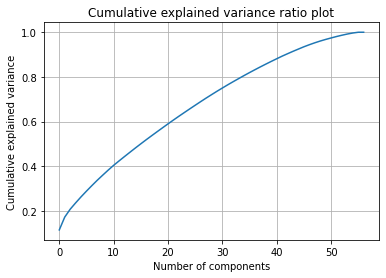

In [53]:
from sklearn.decomposition import PCA

pca = PCA().fit(scaled_data)
explained_var = pca.explained_variance_ratio_

plt.plot(np.cumsum(explained_var))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative explained variance ratio plot')
plt.grid() 
plt.show()

Based on the above diagram, it can be seen that first 47 components explain around 95% variance in the data.
Therefore, instead of selecting all, we will select the first 47 principal components for modeling and we would obtain similar result

In [54]:
# Perform PCA on the feature set
pca = PCA(n_components = 47)
X_pca = pca.fit_transform(X_scaled)

In [55]:
print(X_scaled.shape)
print(X_pca.shape)

(4601, 57)
(4601, 47)


Creating a DataFrame for the principal components

In [56]:
#This will be the new data fed to the algorithm.
principal_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5',
                                                 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15',
                                                 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25',
                                                 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 
                                                 'PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45',
                                                 'PC46', 'PC47'])

principal_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47
0,-0.731750,-0.043026,-0.580662,0.251143,-0.174836,-0.569760,-0.050593,0.071795,0.415564,0.809260,...,0.258058,0.104601,-0.328918,0.025611,0.072388,0.682891,-0.052138,-0.162968,-0.208357,-0.143936
1,-1.185084,2.067850,0.036035,-0.430459,-0.327619,-0.826688,-0.490183,0.621681,-0.883679,-0.351408,...,-0.051902,0.532830,0.163981,-0.288200,0.378792,0.230267,-0.139854,-0.156299,0.291900,0.141545
2,-1.467595,5.023754,3.277591,-0.995065,0.641304,-2.784683,-1.844471,-2.097819,1.982749,-0.259473,...,0.555554,1.216762,1.672497,-0.280127,0.052592,-0.394560,0.709672,0.295599,-0.079436,0.625527
3,-0.805347,0.427503,-0.583107,0.008242,-0.077464,0.547862,0.404900,-0.459410,0.160853,-0.260453,...,-0.002961,0.254880,1.088386,0.382526,-0.278213,-0.467940,-0.216300,-0.238498,-0.840444,-0.410776
4,-0.806279,0.426747,-0.585155,0.008167,-0.077655,0.547753,0.403780,-0.461120,0.160601,-0.261989,...,-0.002230,0.254747,1.087952,0.382583,-0.276466,-0.466795,-0.216558,-0.238331,-0.840652,-0.409227


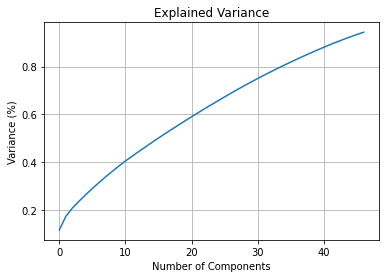

In [57]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.grid() 
plt.show()

Visualizing the first 2 principal components using scatter plot

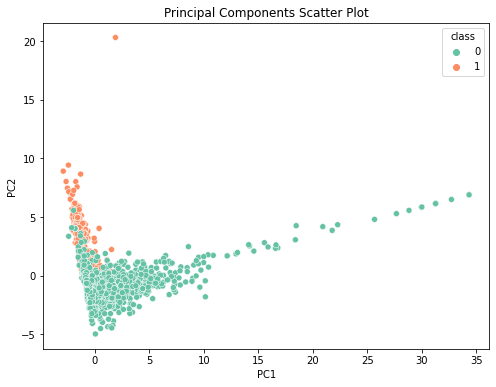

In [58]:
final_df = pd.concat([principal_df, y_df], axis=1)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=final_df, x='PC1', y='PC2', hue='class', palette='Set2')
plt.title('Principal Components Scatter Plot')
plt.show()

Model Building

Finding the optimal value for maximum depth of the tree.

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

#Define the parameter grid
param_grid = {'max_depth': [1, 2, 3, 4, 5, 7, 9]}

#Create a decision tree classifier and perform grid search
d_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(d_tree, param_grid, cv=5)

#Fit the GridSearchCV object to the data
grid_search.fit(X_pca, y_df)
print(grid_search.best_params_)
print(grid_search.best_score_)



{'max_depth': 7}
0.863286361705141


In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#function to perform training with entropy
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 100, max_depth = 7, min_samples_leaf=5)

In [90]:
#split dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_df, random_state=0, test_size=0.2)

In [91]:
# Fit the Model
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5,
                       random_state=100)

In [92]:
#Predict the test set results
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

Model Visualization

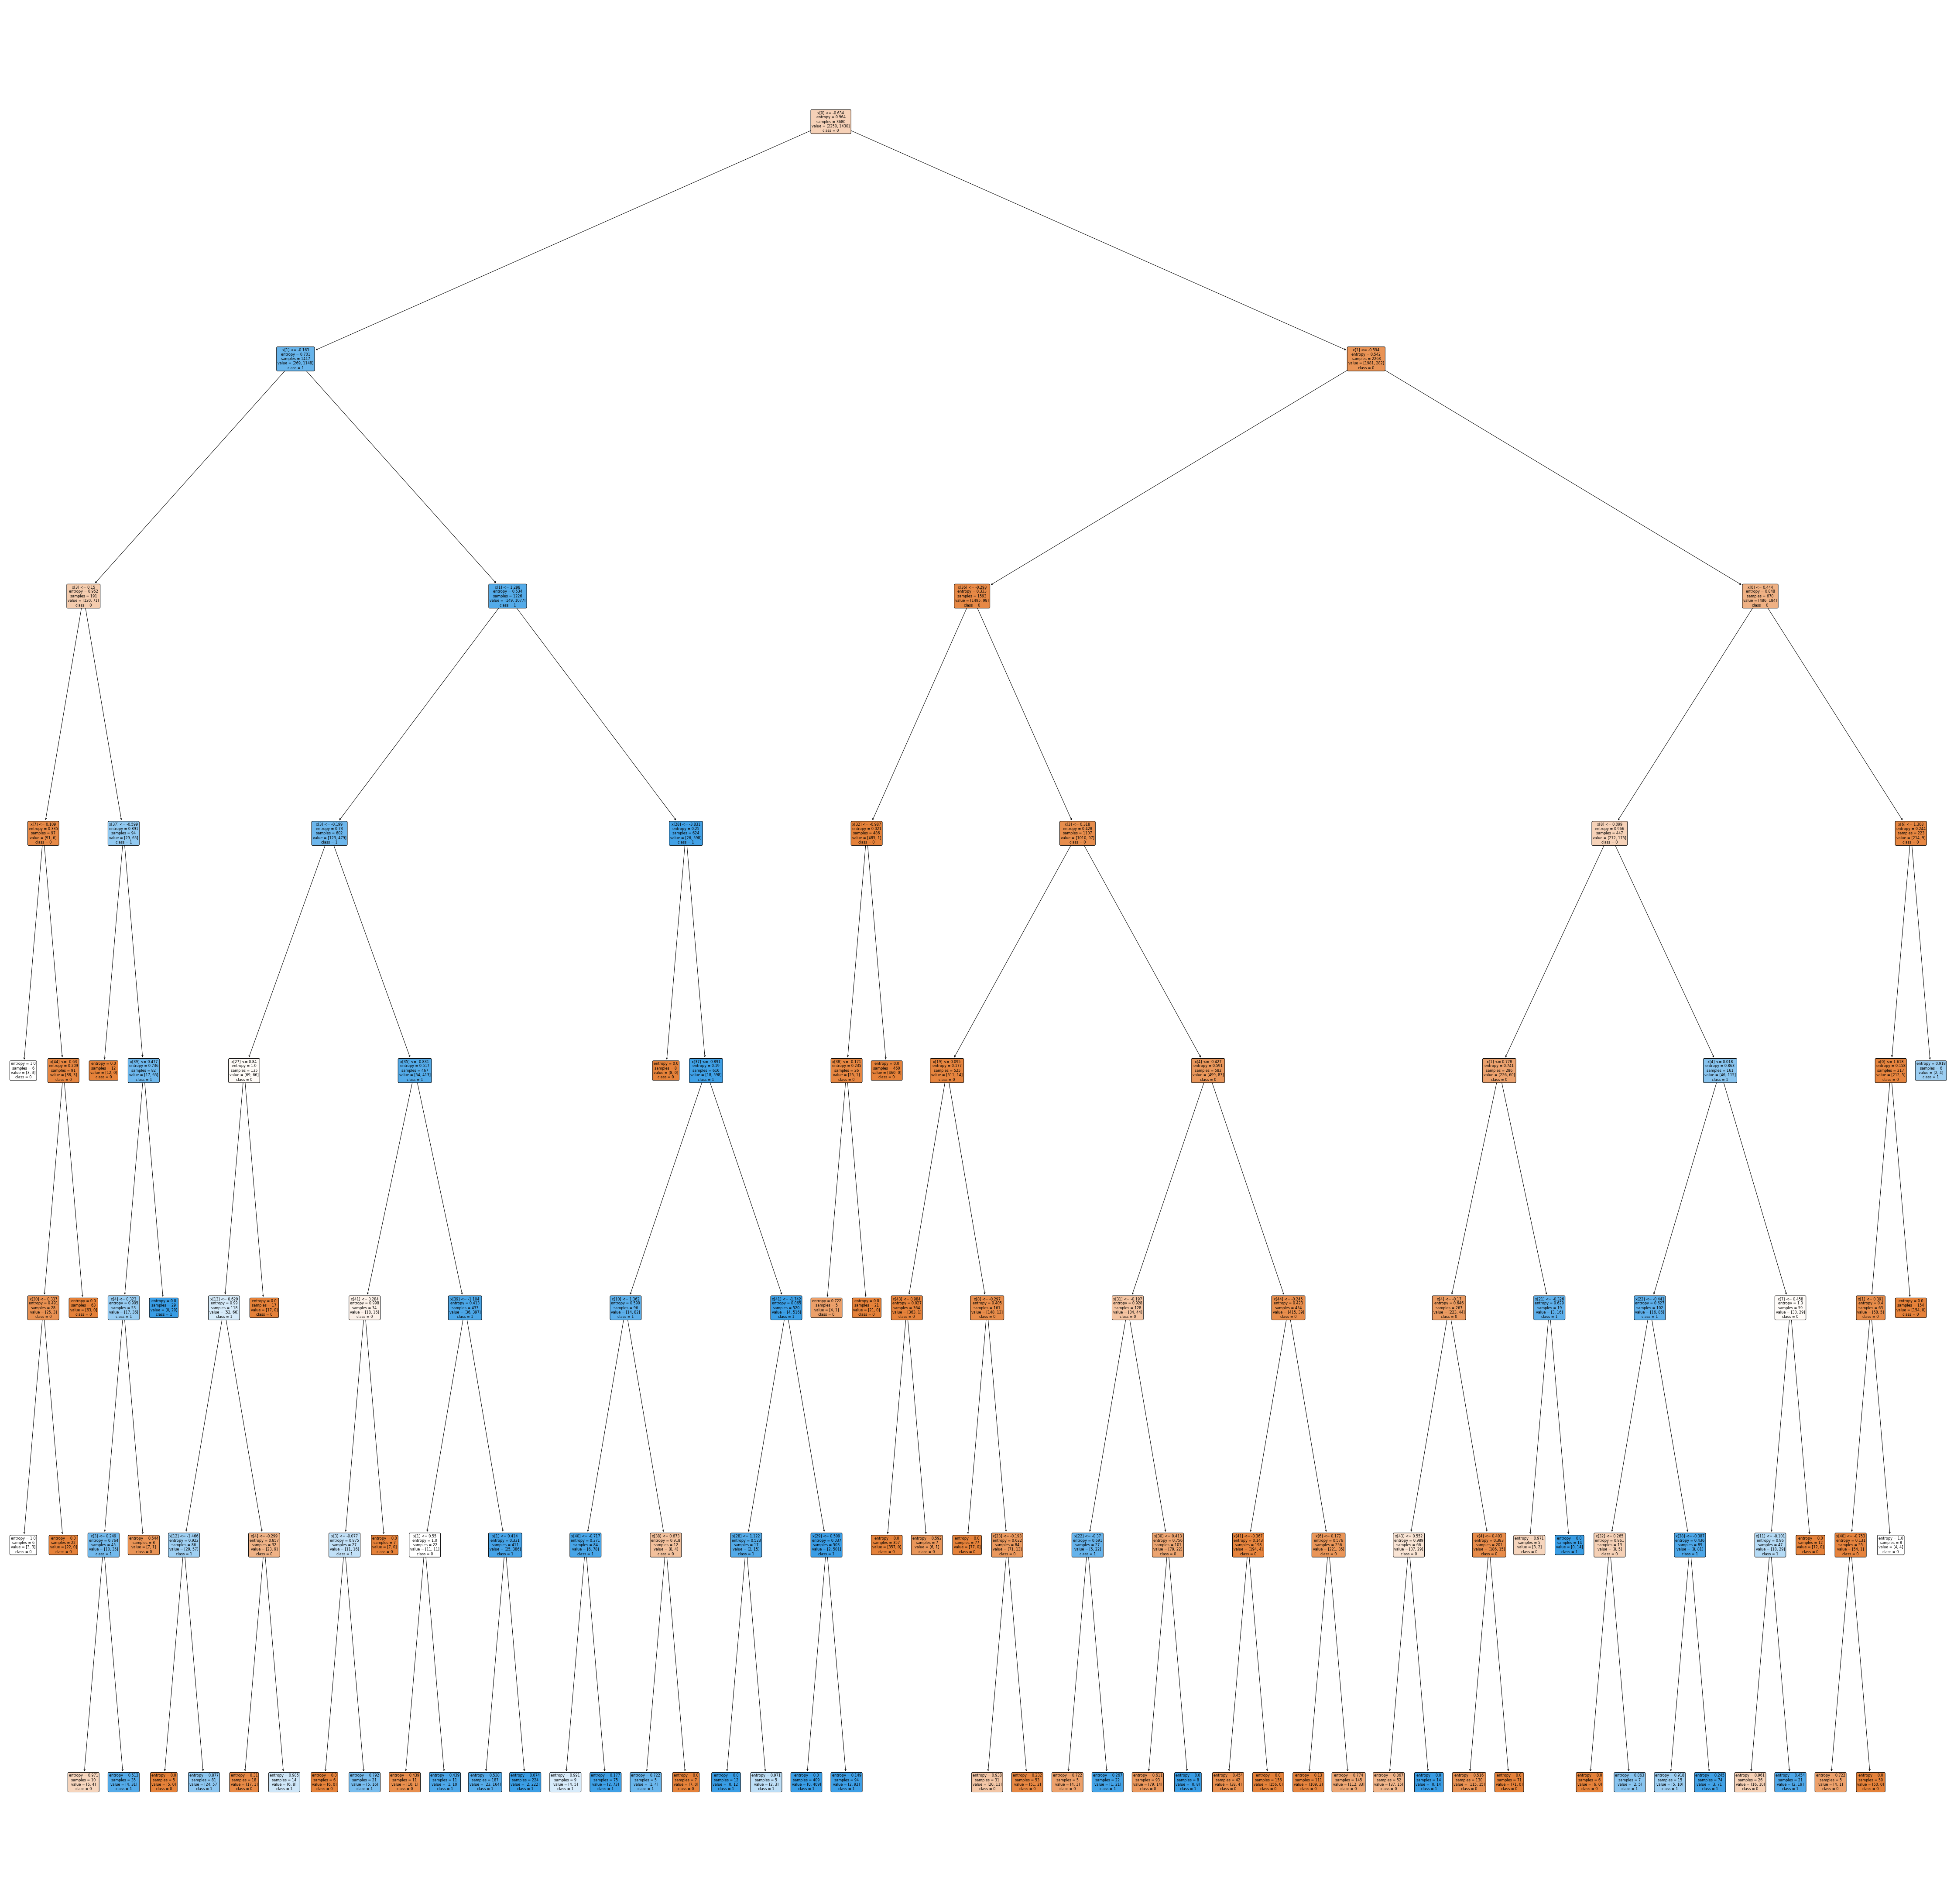

In [93]:
from sklearn.tree import plot_tree

plt.figure(figsize=(80,80))
plot_tree(model, class_names=['0', '1'], filled=True, rounded=True)
plt.show()


Model Evaluation

In [94]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[0.92379182 0.07620818]
 [0.12010444 0.87989556]]


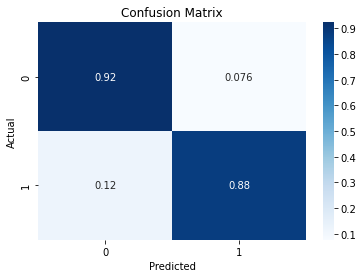

In [95]:
#Visualization of the confusion matrix 
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [100]:
#Checking the f1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("f1 score:",f1)

f1 score: 0.885676741130092


In [101]:
#Checking the Accuracy
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
print("Accuracy score:",ac)

Accuracy score: 0.9055374592833876


In [102]:
#Precision score
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("Precision score:", precision)

Precision score: 0.8915343915343915


In [104]:
#Recall score
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("Recall Score:", recall)

Recall Score: 0.8798955613577023


In [103]:
#classification report
from sklearn.metrics import classification_report
class_rep = classification_report(y_test,y_pred)
print("Classification Report:\n",class_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       538
           1       0.89      0.88      0.89       383

    accuracy                           0.91       921
   macro avg       0.90      0.90      0.90       921
weighted avg       0.91      0.91      0.91       921

